<a href="https://colab.research.google.com/github/Rajeshnaidu001/ailabproject5thsem/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set
Given dataset provides the weather data for city Delhi, India. We will try to analyze the weather and predict the temperature field _tempm in the datset with ***Time Series Forecasting***.

In [1]:
# import os
# os.environ['KAGGLE_USERNAME'] = "Your Kaggle Username"
# os.environ['KAGGLE_KEY'] = "Your Kaggle Key"

In [2]:
# !kaggle datasets download -d mahirkukreja/delhi-weather-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [3]:
# from zipfile import ZipFile

# with ZipFile('/content/delhi-weather-data.zip', 'r') as zipObj:
#    zipObj.extractall()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [5]:
df = pd.read_csv("/content/testset.csv")

In [6]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [7]:
df[' _conds'].value_counts()

,count
_conds,
Haze,47602
Smoke,20760
Mist,9375
Clear,3129
Widespread Dust,2856
Fog,2760
Scattered Clouds,2209
Partly Cloudy,2091
Shallow Fog,1860


### Part 1: A quick analysis of Weather in Delhi

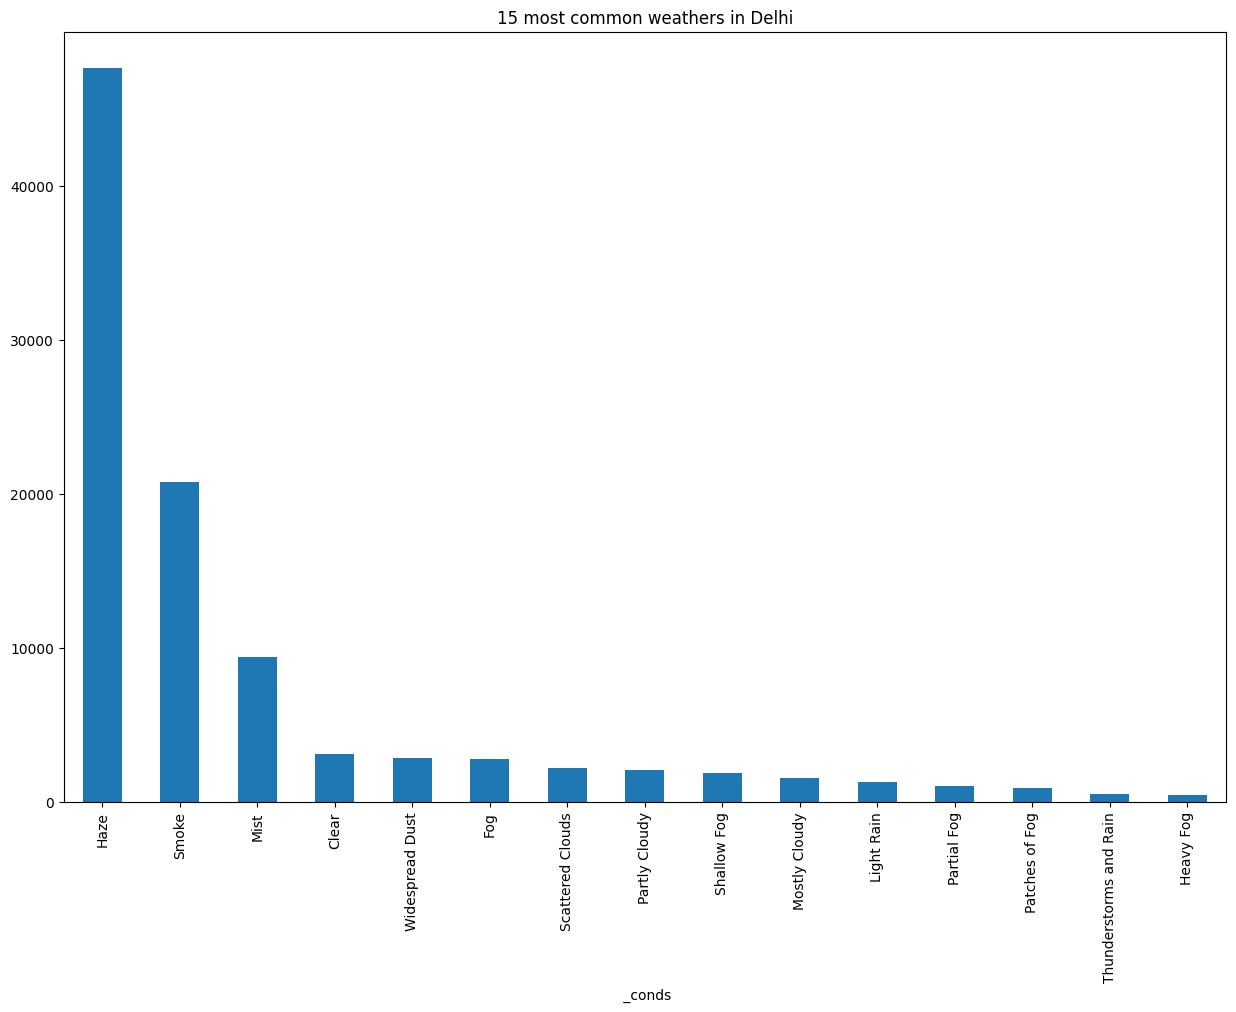

In [8]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

It is clearly visible that Haze and Smoke are most common weatehrs in Delhi

[]

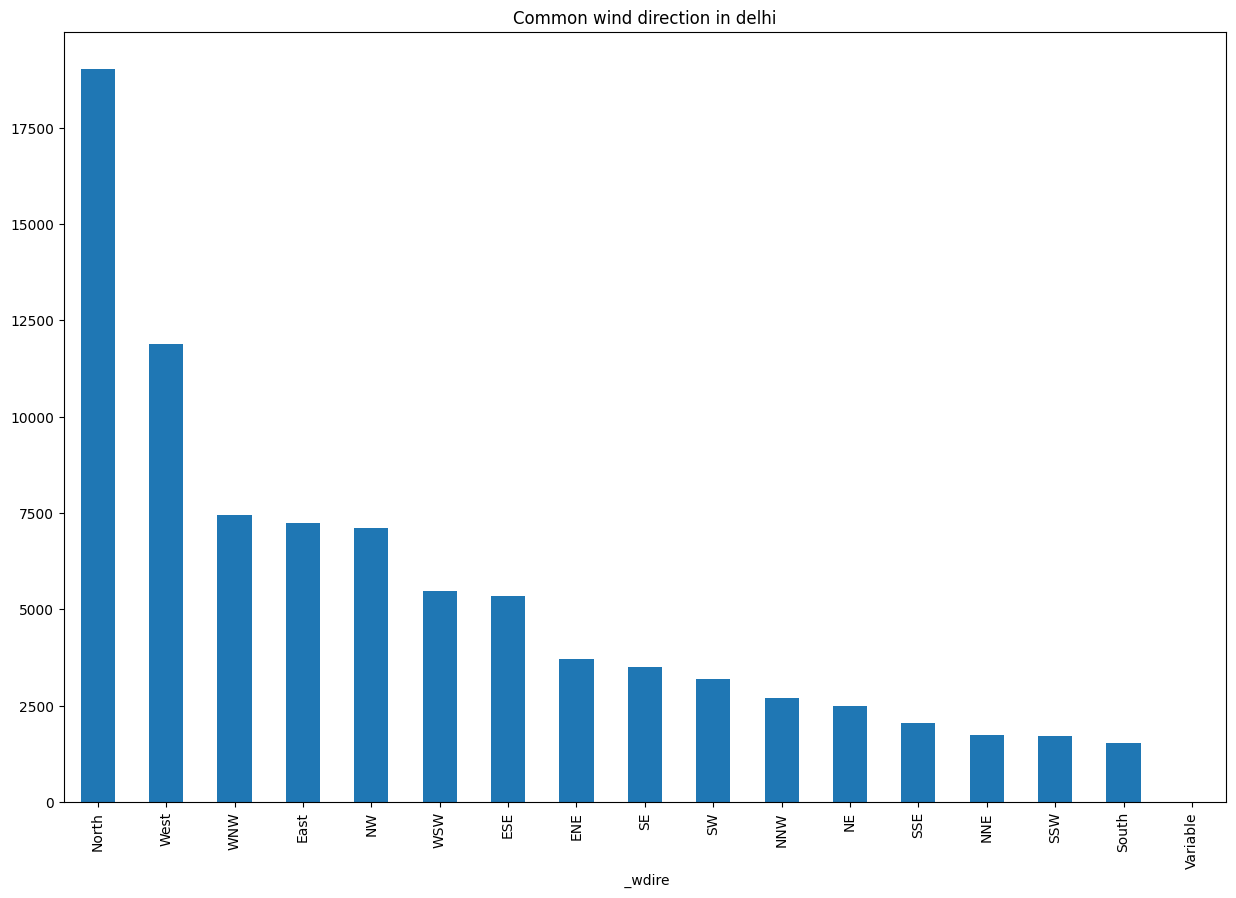

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in dehi.

/tmp/ipython-input-1216561183.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)


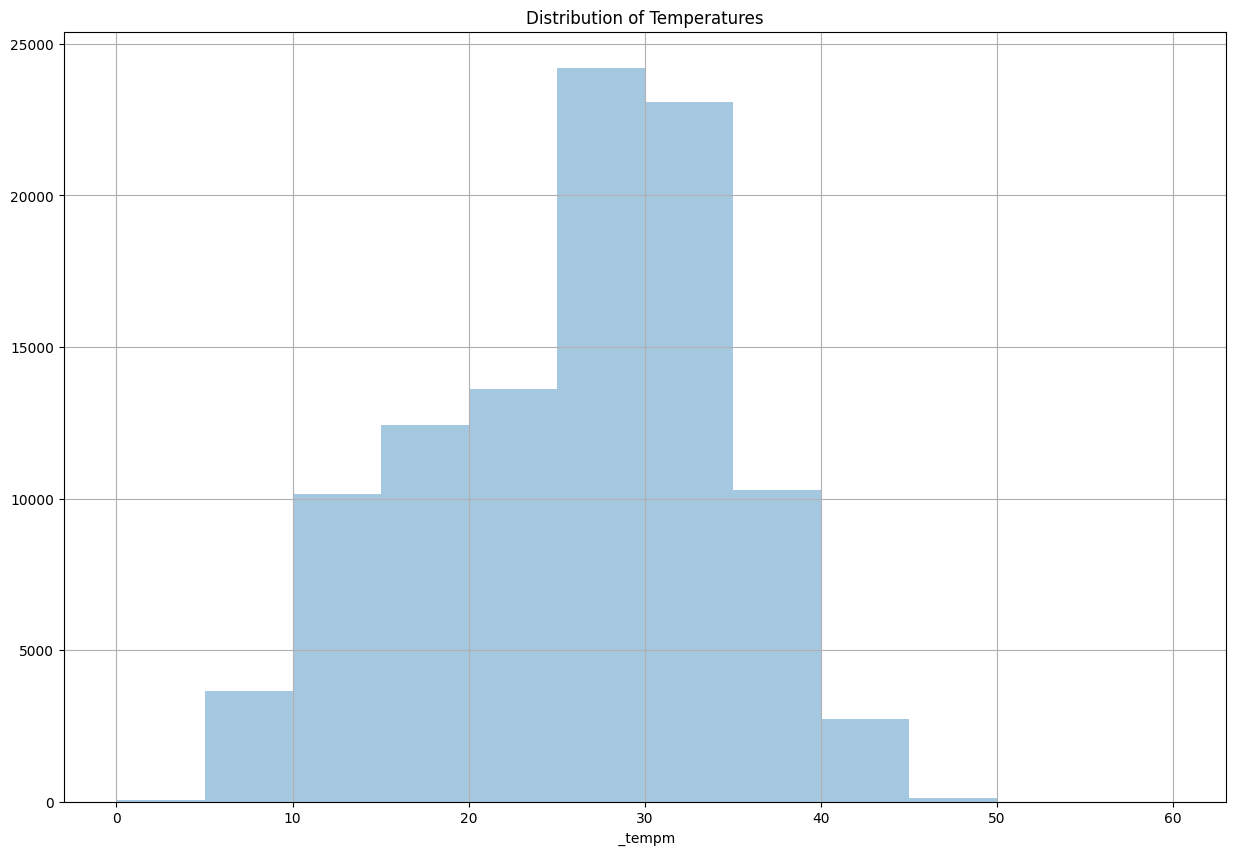

In [10]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [11]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [12]:
df['datetime_utc']

,datetime_utc
0,1996-11-01 11:00:00
1,1996-11-01 12:00:00
2,1996-11-01 13:00:00
3,1996-11-01 14:00:00
4,1996-11-01 16:00:00
...,...
100985,2017-04-24 06:00:00
100986,2017-04-24 09:00:00
100987,2017-04-24 12:00:00
100988,2017-04-24 15:00:00


In [13]:
df.isna().sum()

,0
datetime_utc,0
_conds,72
_dewptm,621
_fog,0
_hail,0
_heatindexm,71835
_hum,757
_precipm,100990
_pressurem,232
_rain,0


In [14]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

/tmp/ipython-input-3248270873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)


In [15]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()


np.int64(0)

In [16]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [17]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [18]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [19]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [20]:
df['year']

,year
0,1996
1,1996
2,1996
3,1996
4,1996
...,...
100985,2017
100986,2017
100987,2017
100988,2017


In [21]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

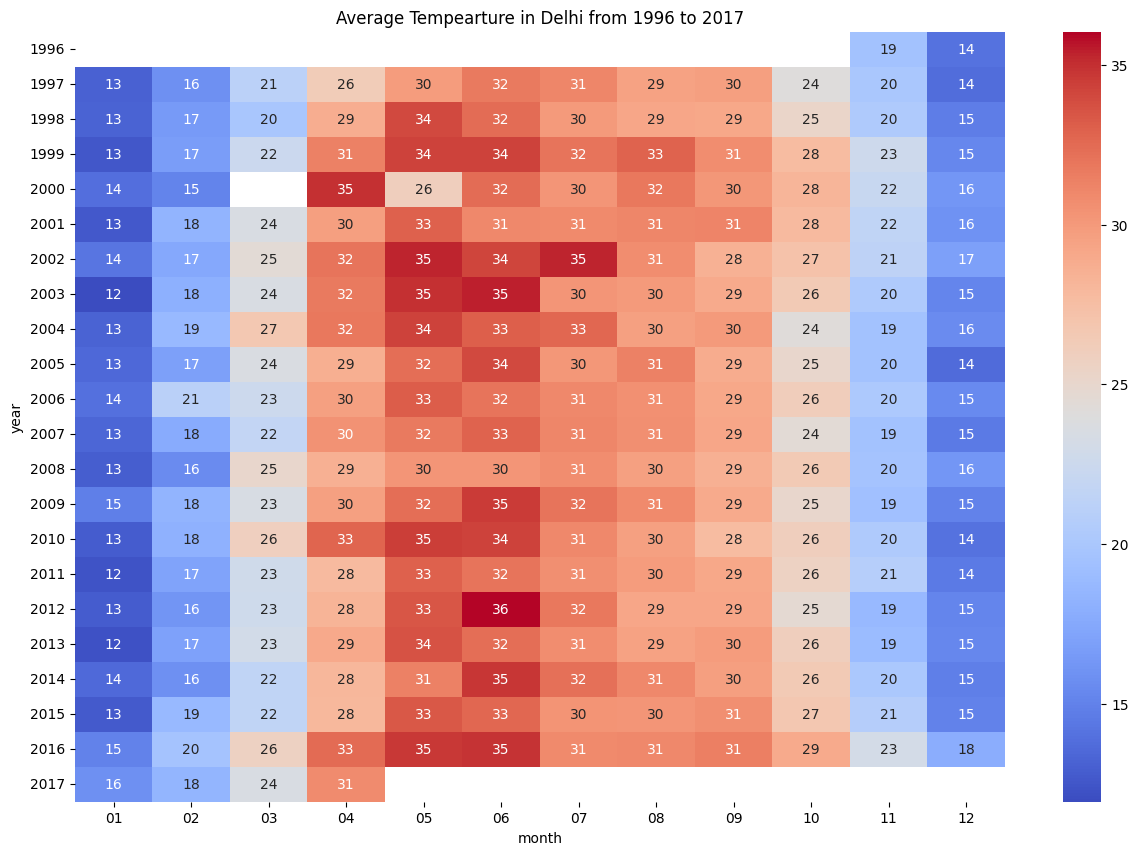

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [23]:
df[' _hum'].isna().sum()

np.int64(757)

In [24]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

/tmp/ipython-input-2694068701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)


In [25]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

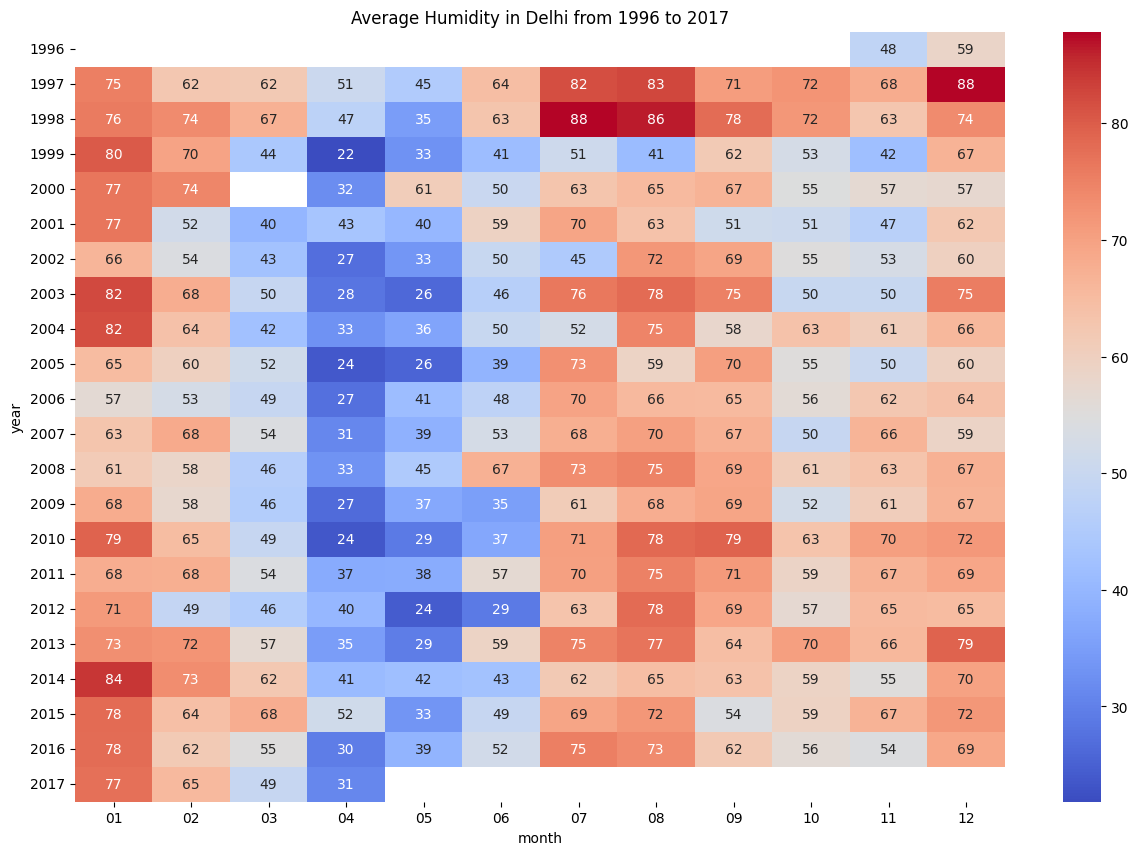

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()


# Time Series Forecasting

In [27]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [28]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [29]:
data = data.resample('D').mean()

In [30]:
data.temp.isna().sum()

np.int64(141)

In [31]:
data.fillna(data['temp'].mean(), inplace=True)

In [32]:
data.temp.isna().sum()

np.int64(0)

In [33]:
data.shape

(7480, 1)

In [34]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


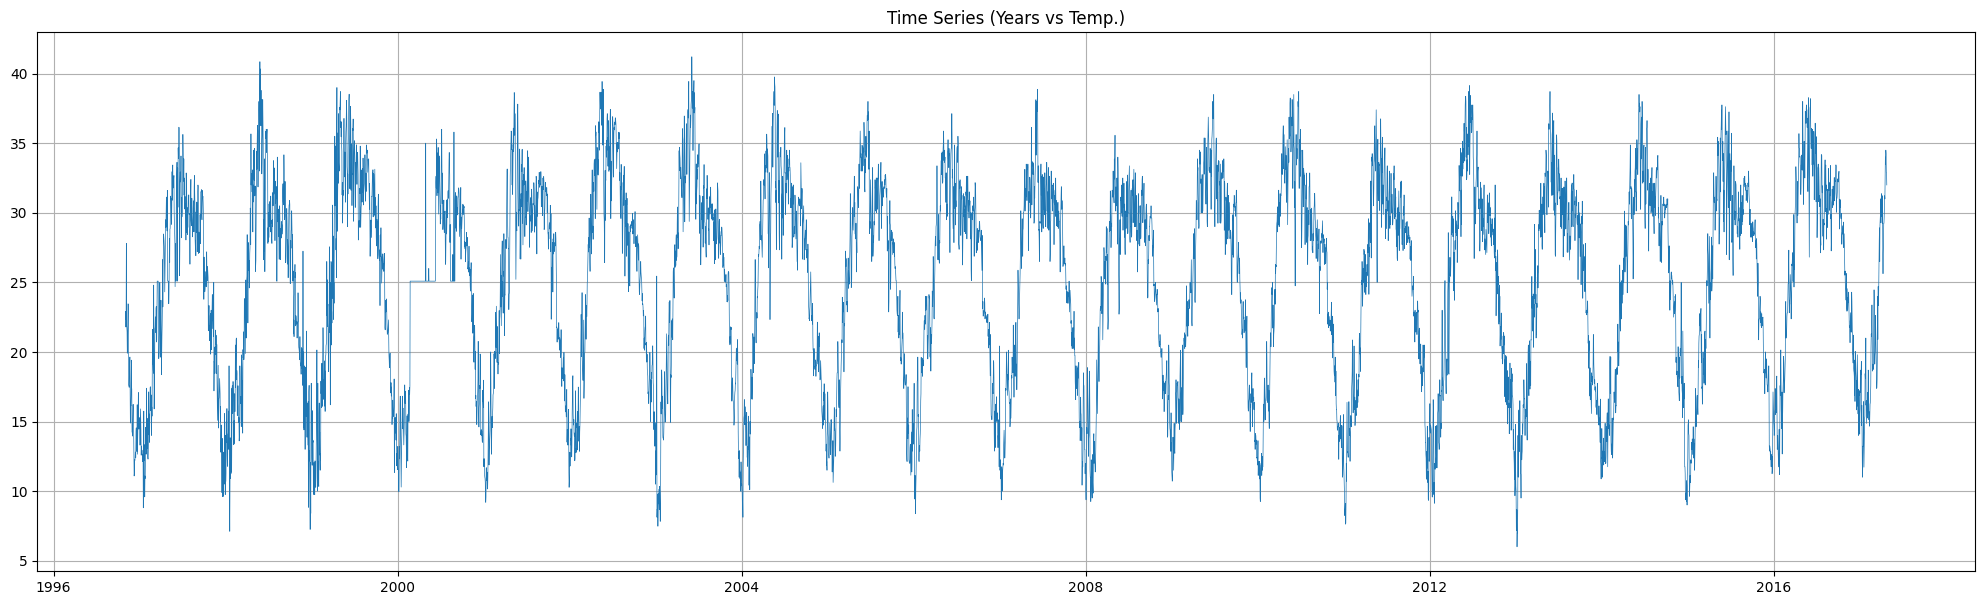

In [35]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [36]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [37]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [38]:
data_scaled.shape

(7480, 1)

In [39]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [40]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [41]:
k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]
Ytrain = Y[:k]
Ytest= Y[k:]

In [42]:
X.shape

(7450, 30, 1)

In [43]:
Xtrain.shape

(7300, 30, 1)

In [44]:
Xtest.shape

(150, 30, 1)

In [45]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [47]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - loss: 0.0319
Epoch 2/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0120
Epoch 3/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - loss: 0.0111
Epoch 4/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.0107
Epoch 5/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - loss: 0.0109
Epoch 6/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - loss: 0.0104
Epoch 7/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - loss: 0.0099
Epoch 8/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - loss: 0.0100
Epoch 9/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - loss: 0.0099
Epoch 10/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0108
Epoch 11/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0101
Epoch 12/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - loss: 0.0093
Epoch 13/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.0093
Epoch 14/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - loss: 0.0094
Epoch 15/300
22

In [56]:
model.save("./regressor.hdf5")

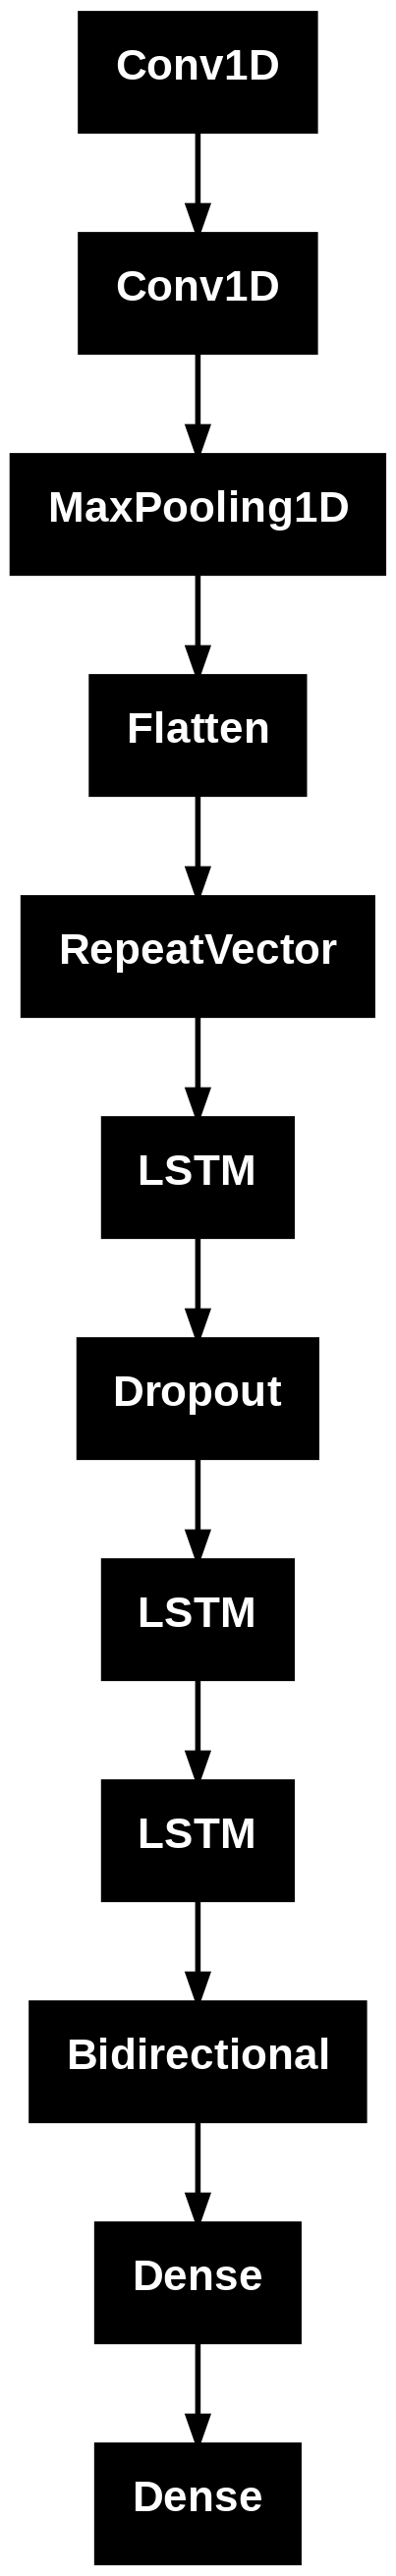

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [69]:
predict = model.predict(Xtest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [70]:
predict = scalar.inverse_transform(predict)

In [71]:
Ytesting = scalar.inverse_transform(Ytest)

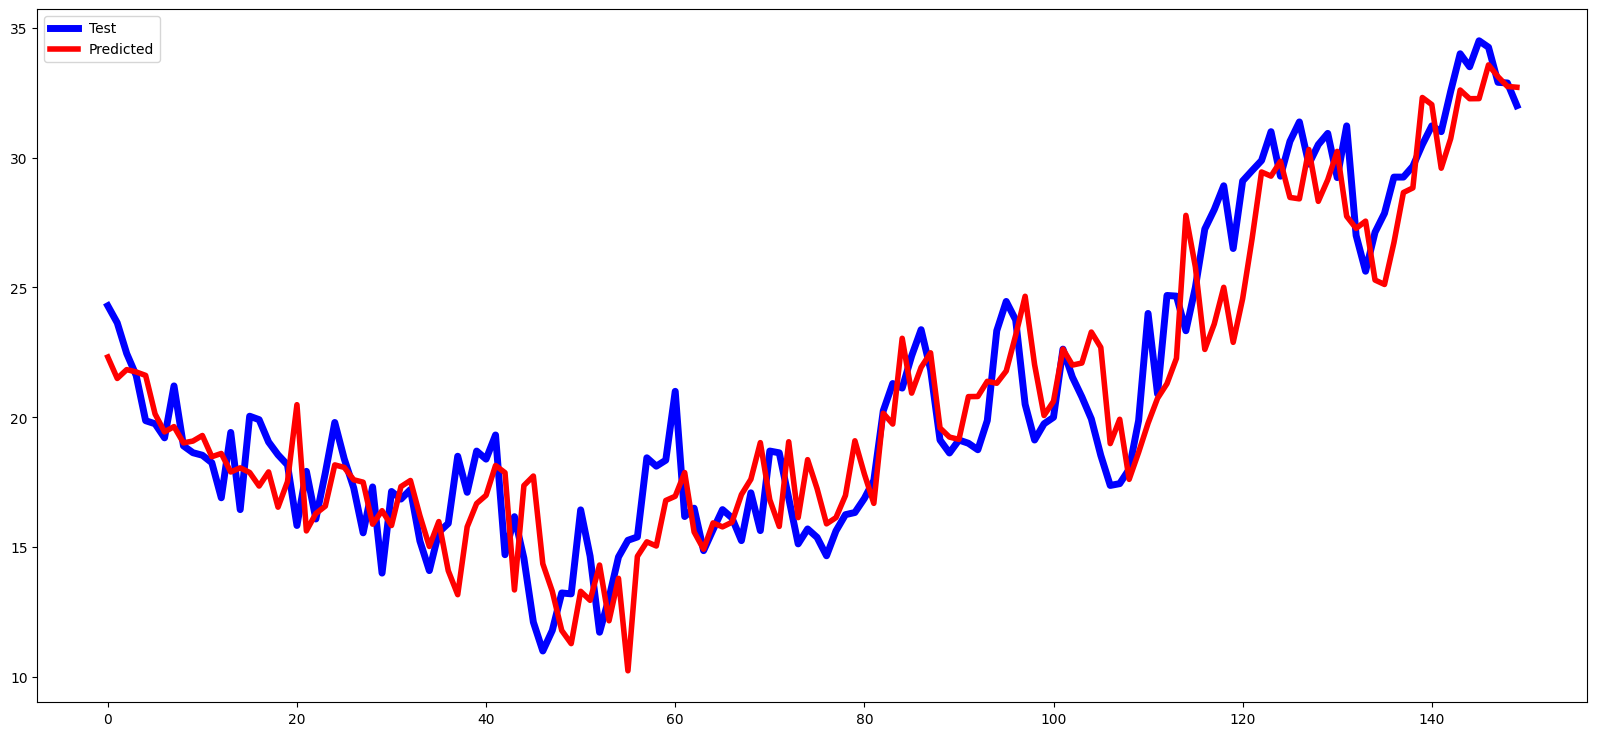

In [72]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

4.53398169899043